In [35]:
## EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import shap

## feature engineering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

## model preparation libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## model evaluation libraries
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

## model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import joblib
%matplotlib inline

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [4]:
df=pd.read_csv('C:\TMLC\PROJECT 3 (YIELD)\Dataset\WildBlueberryPollinationSimulationData.csv')

In [5]:
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [6]:
df.tail()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
772,772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735
776,776,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,24.00,0.39,0.384646,0.392303,29.742583,3943.131681


In [7]:
df.shape

(777, 18)

In [8]:
df._get_numeric_data()
#all data is numeric data

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735


In [9]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [10]:
df.info()
# no null value is present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [11]:
df.dtypes
# all float values observed

Row#                      int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

array([[<Axes: title={'center': 'Row#'}>,
        <Axes: title={'center': 'clonesize'}>,
        <Axes: title={'center': 'honeybee'}>,
        <Axes: title={'center': 'bumbles'}>],
       [<Axes: title={'center': 'andrena'}>,
        <Axes: title={'center': 'osmia'}>,
        <Axes: title={'center': 'MaxOfUpperTRange'}>,
        <Axes: title={'center': 'MinOfUpperTRange'}>],
       [<Axes: title={'center': 'AverageOfUpperTRange'}>,
        <Axes: title={'center': 'MaxOfLowerTRange'}>,
        <Axes: title={'center': 'MinOfLowerTRange'}>,
        <Axes: title={'center': 'AverageOfLowerTRange'}>],
       [<Axes: title={'center': 'RainingDays'}>,
        <Axes: title={'center': 'AverageRainingDays'}>,
        <Axes: title={'center': 'fruitset'}>,
        <Axes: title={'center': 'fruitmass'}>],
       [<Axes: title={'center': 'seeds'}>,
        <Axes: title={'center': 'yield'}>, <Axes: >, <Axes: >]],
      dtype=object)

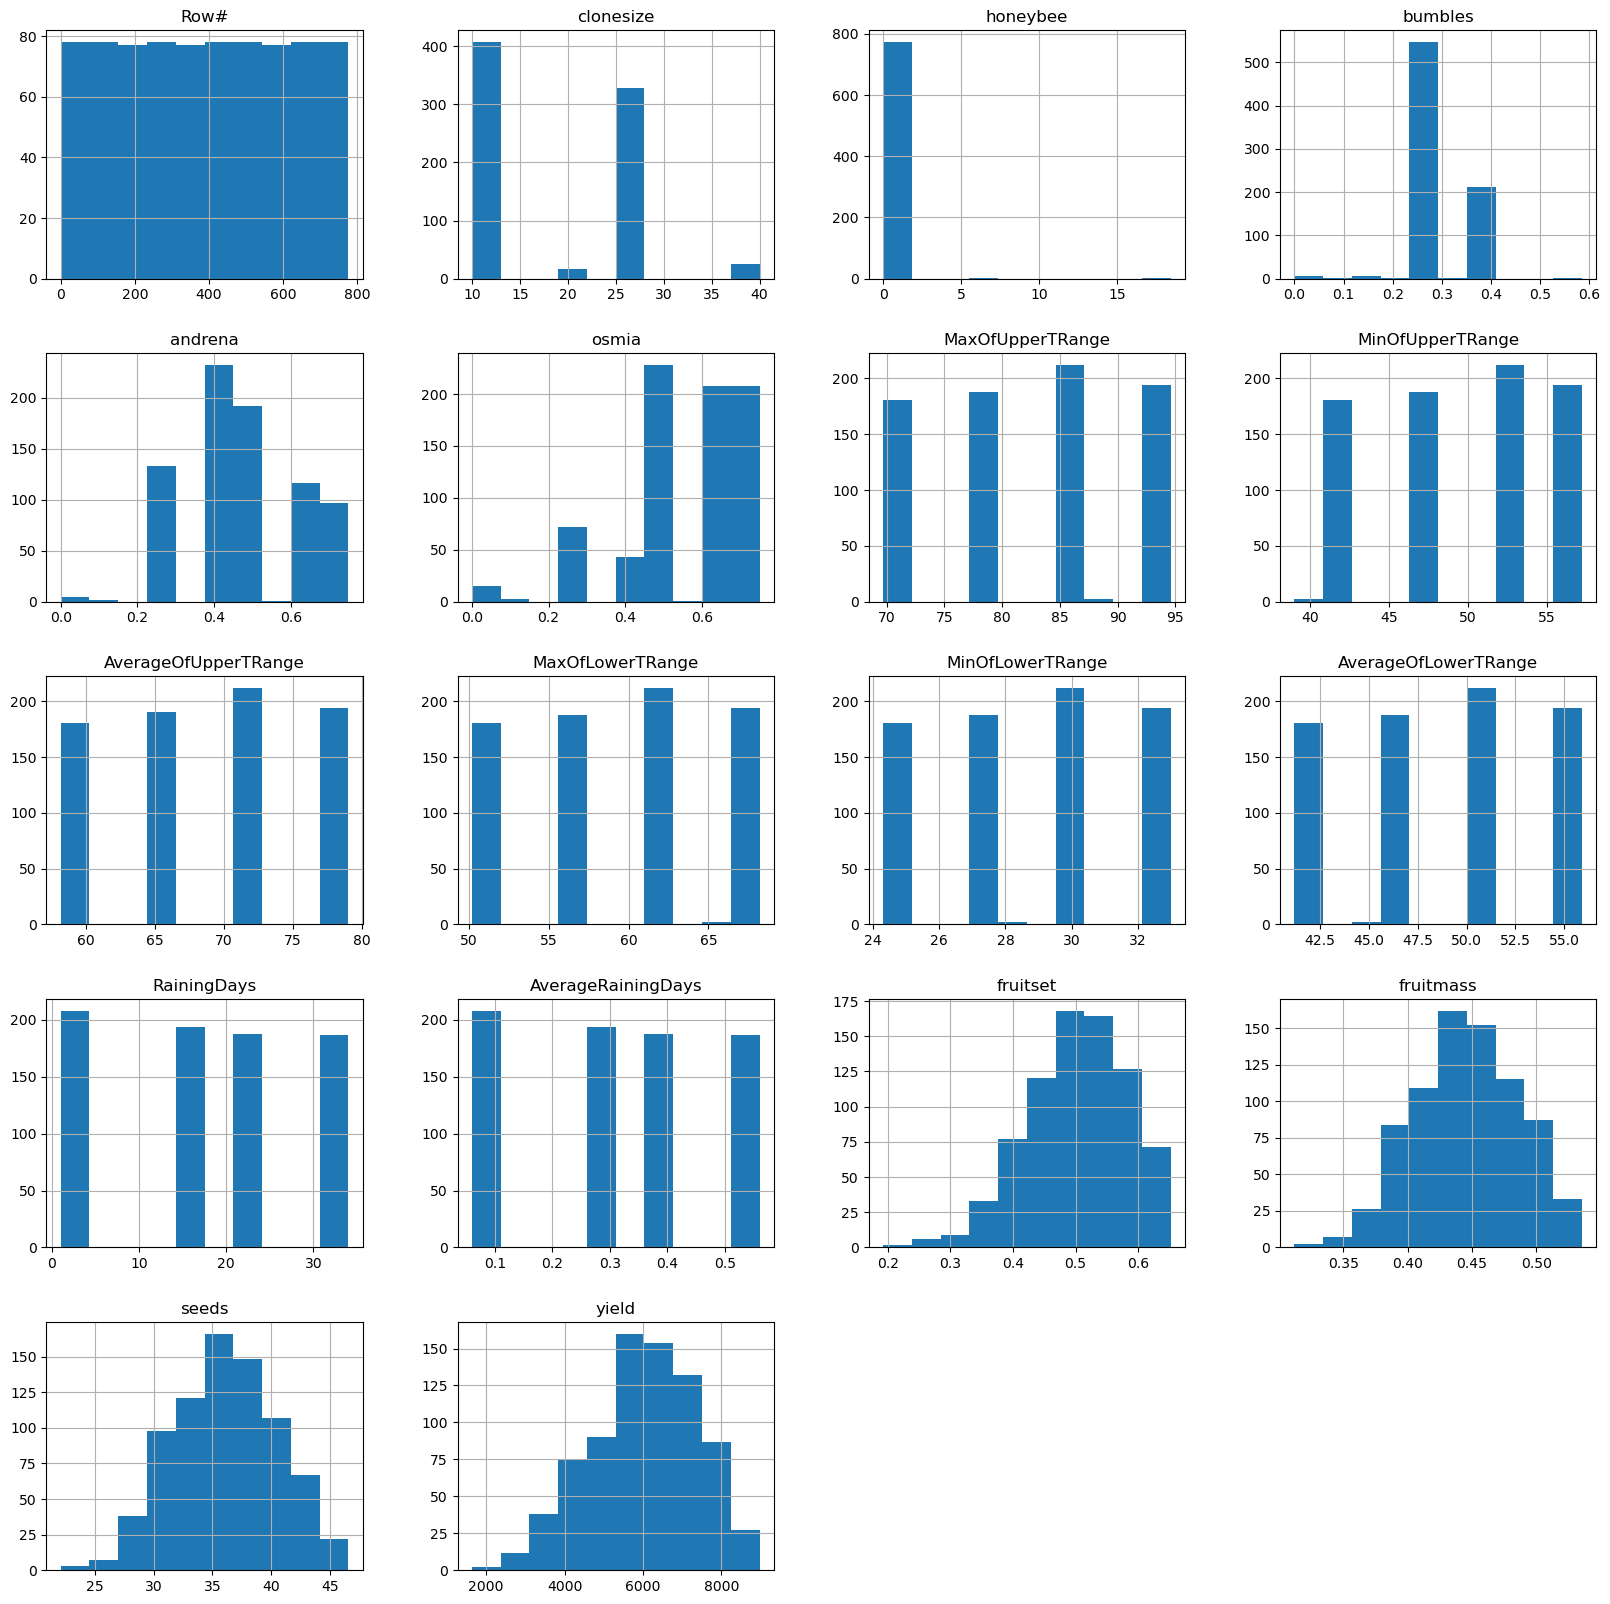

In [12]:
df.hist(figsize=(20,20))

In [13]:
df.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [14]:
df.isna().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

Inference #1=>No categorical data present in the dataset

Inference #2=>No missing values in the dataset

In [15]:
for i in df.columns:
    print(f"Unique values in {i} are:")
    print(df[i].nunique(), '\n')

Unique values in Row# are:
777 

Unique values in clonesize are:
6 

Unique values in honeybee are:
7 

Unique values in bumbles are:
10 

Unique values in andrena are:
12 

Unique values in osmia are:
12 

Unique values in MaxOfUpperTRange are:
5 

Unique values in MinOfUpperTRange are:
5 

Unique values in AverageOfUpperTRange are:
5 

Unique values in MaxOfLowerTRange are:
5 

Unique values in MinOfLowerTRange are:
5 

Unique values in AverageOfLowerTRange are:
5 

Unique values in RainingDays are:
5 

Unique values in AverageRainingDays are:
5 

Unique values in fruitset are:
777 

Unique values in fruitmass are:
777 

Unique values in seeds are:
777 

Unique values in yield are:
777 



In [16]:
print(df['clonesize'].unique)

<bound method Series.unique of 0      37.5
1      37.5
2      37.5
3      37.5
4      37.5
       ... 
772    10.0
773    40.0
774    20.0
775    20.0
776    20.0
Name: clonesize, Length: 777, dtype: float64>


{'whiskers': [<matplotlib.lines.Line2D at 0x1bd87a15b50>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd87a17050>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd87a15410>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd87a201d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd87a20a10>],
 'means': []}

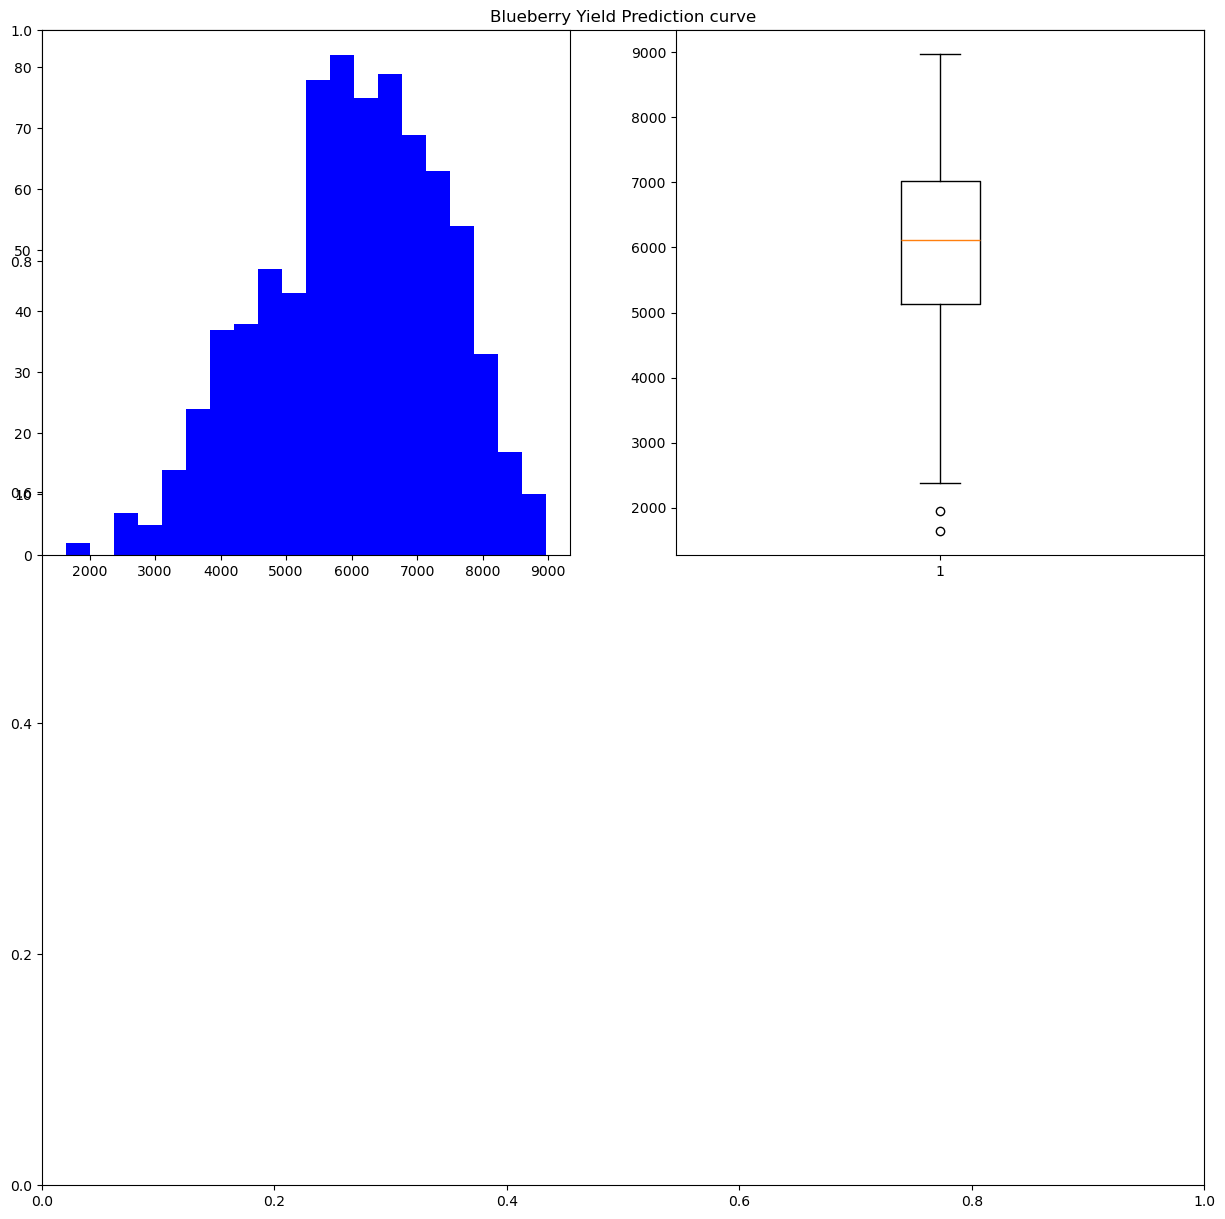

In [17]:
fig=plt.figure(figsize=(15,15))
plt.title('Blueberry Yield Prediction curve')
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
x=df['yield']
ax1.hist(x,bins=20, color='blue')
ax2.boxplot(x)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

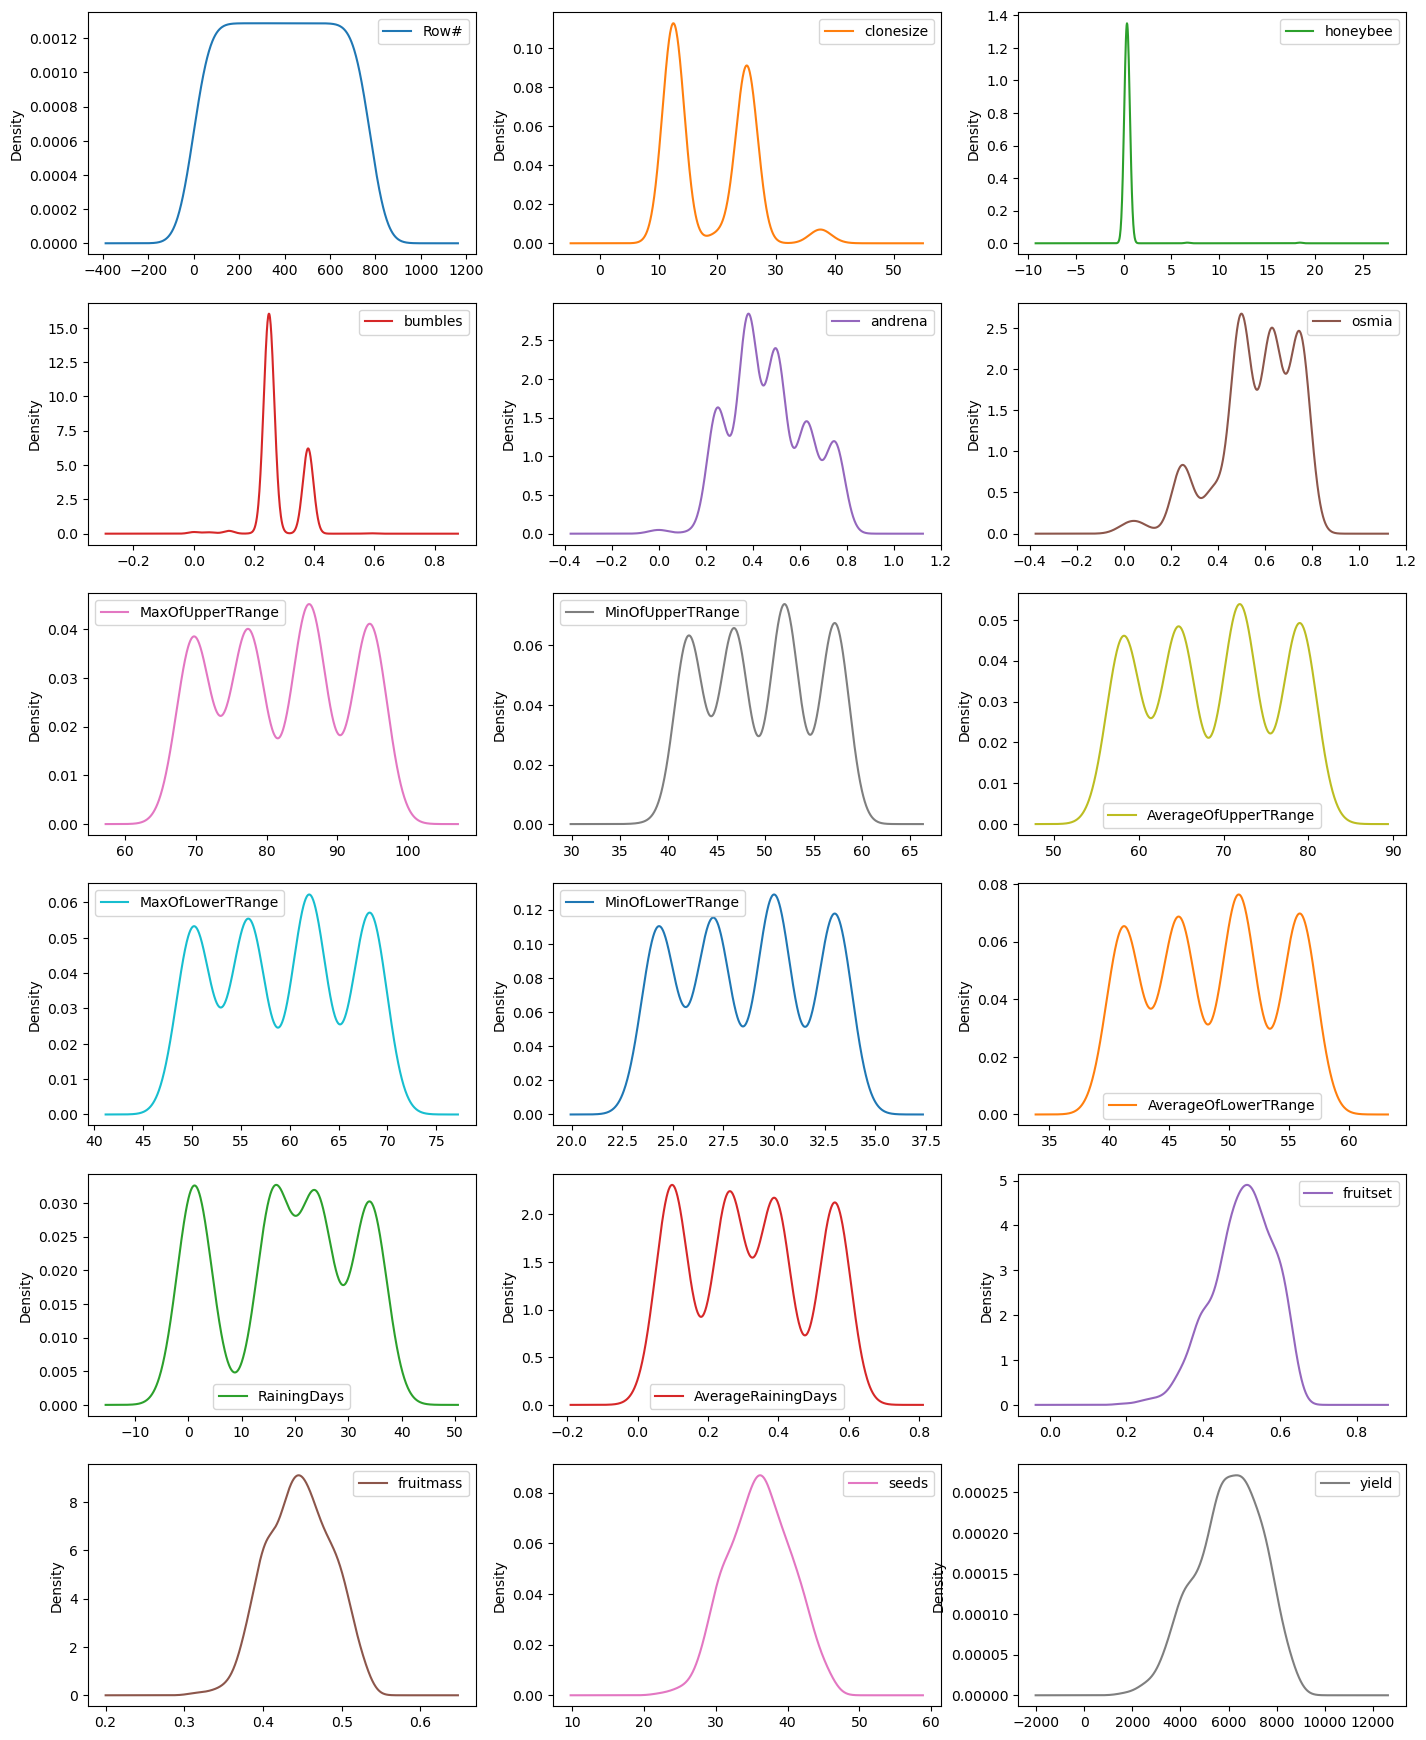

In [18]:
df.plot(kind="density", 
                subplots=True, 
                layout = (6,3), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False)


Row#                        Axes(0.125,0.77;0.227941x0.11)
clonesize                Axes(0.398529,0.77;0.227941x0.11)
honeybee                 Axes(0.672059,0.77;0.227941x0.11)
bumbles                    Axes(0.125,0.638;0.227941x0.11)
andrena                 Axes(0.398529,0.638;0.227941x0.11)
osmia                   Axes(0.672059,0.638;0.227941x0.11)
MaxOfUpperTRange           Axes(0.125,0.506;0.227941x0.11)
MinOfUpperTRange        Axes(0.398529,0.506;0.227941x0.11)
AverageOfUpperTRange    Axes(0.672059,0.506;0.227941x0.11)
MaxOfLowerTRange           Axes(0.125,0.374;0.227941x0.11)
MinOfLowerTRange        Axes(0.398529,0.374;0.227941x0.11)
AverageOfLowerTRange    Axes(0.672059,0.374;0.227941x0.11)
RainingDays                Axes(0.125,0.242;0.227941x0.11)
AverageRainingDays      Axes(0.398529,0.242;0.227941x0.11)
fruitset                Axes(0.672059,0.242;0.227941x0.11)
fruitmass                   Axes(0.125,0.11;0.227941x0.11)
seeds                    Axes(0.398529,0.11;0.227941x0.1

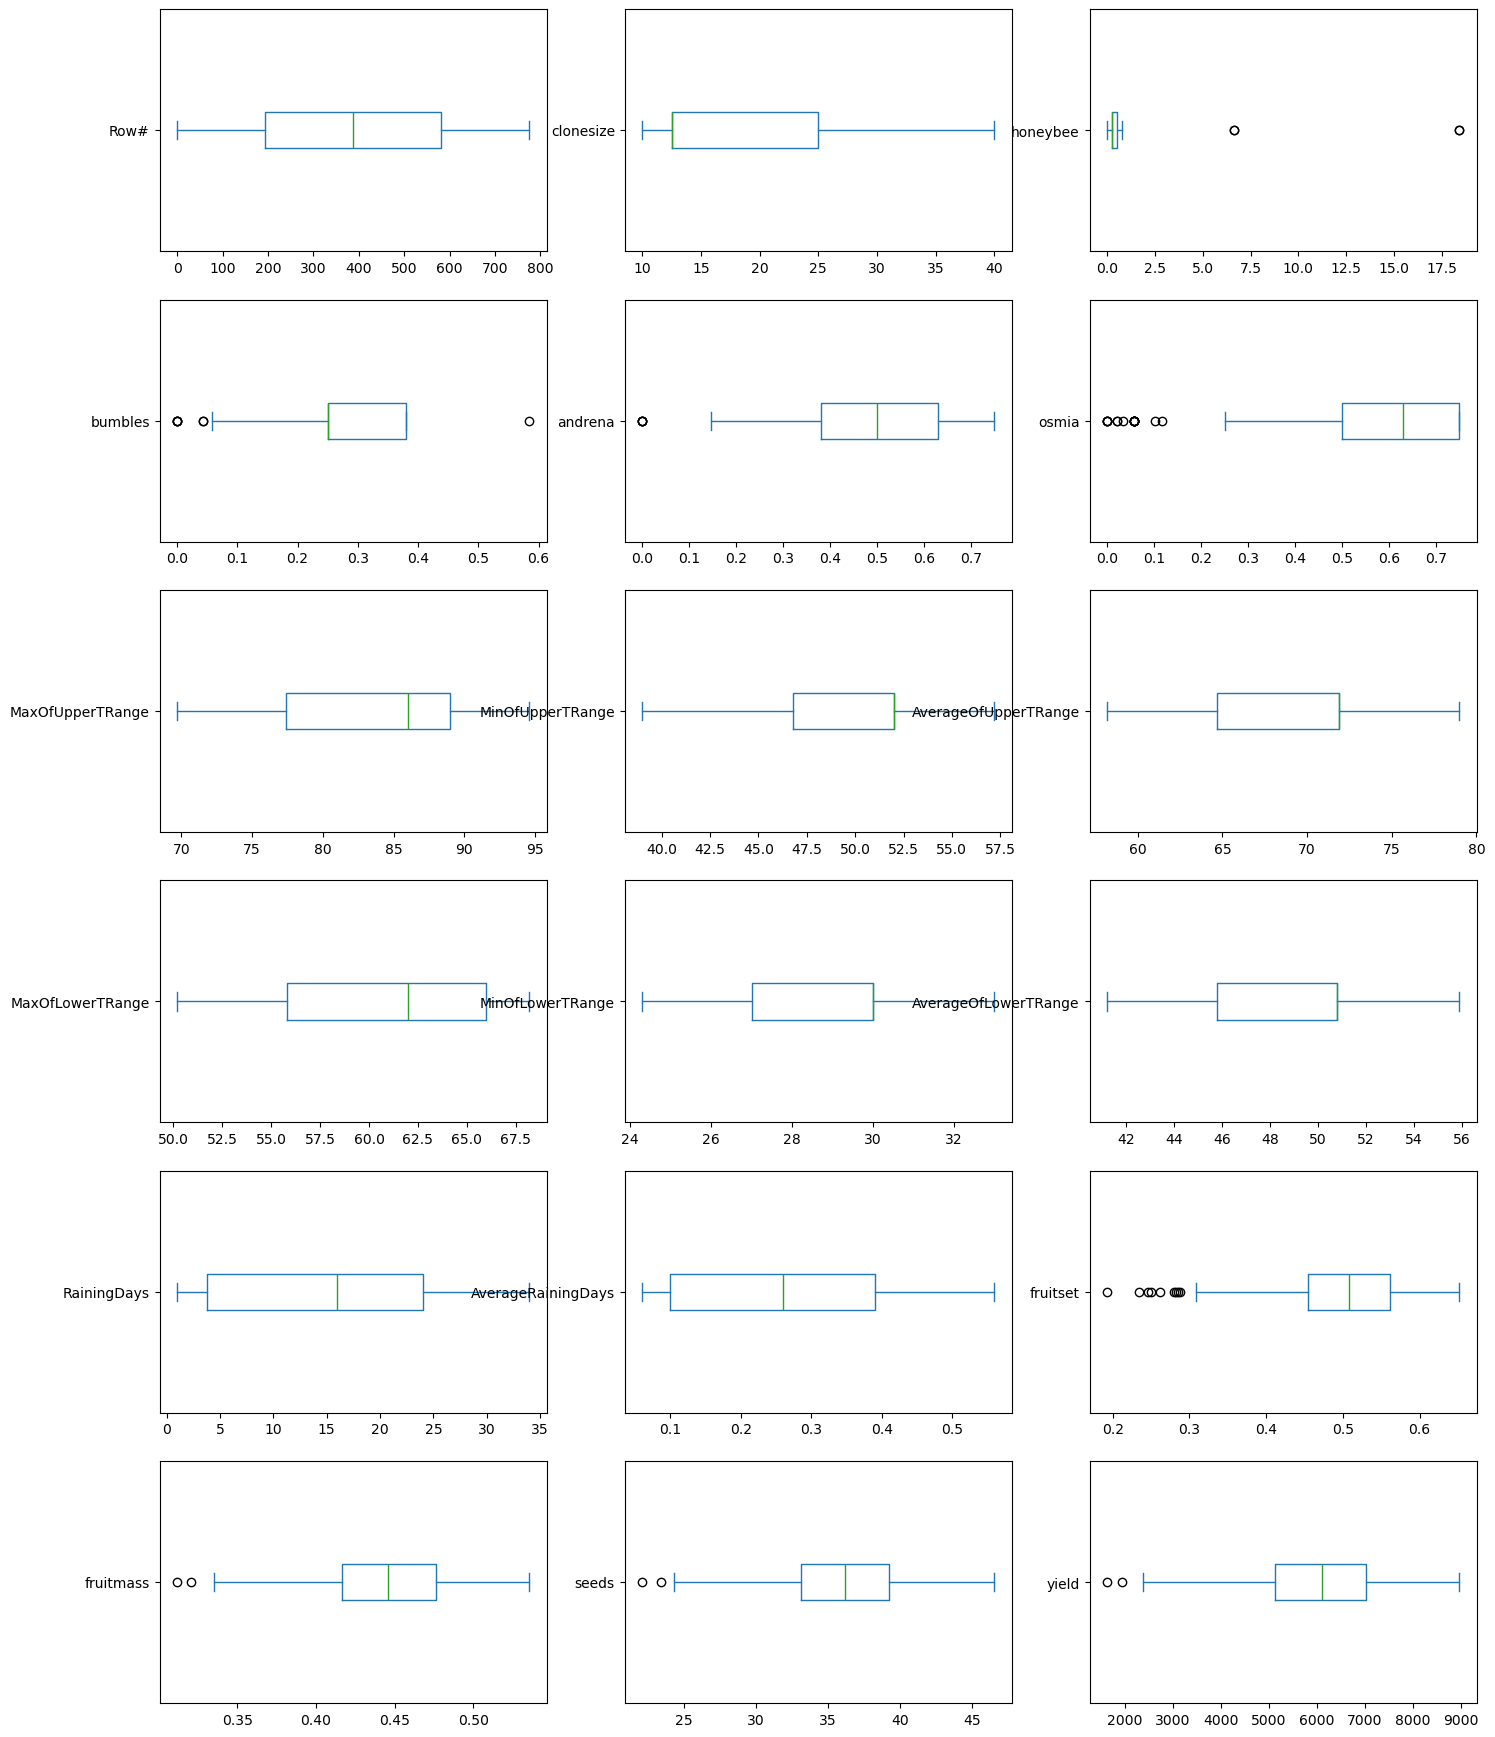

In [19]:
df.plot(kind="box", 
                vert=False, # makes horizontal plots instead of vertical
                subplots=True, 
                layout = (6,3), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False)

# <span style="font-family:cursive;text-align:center">📊 Multivariate Analysis</span>

<Axes: >

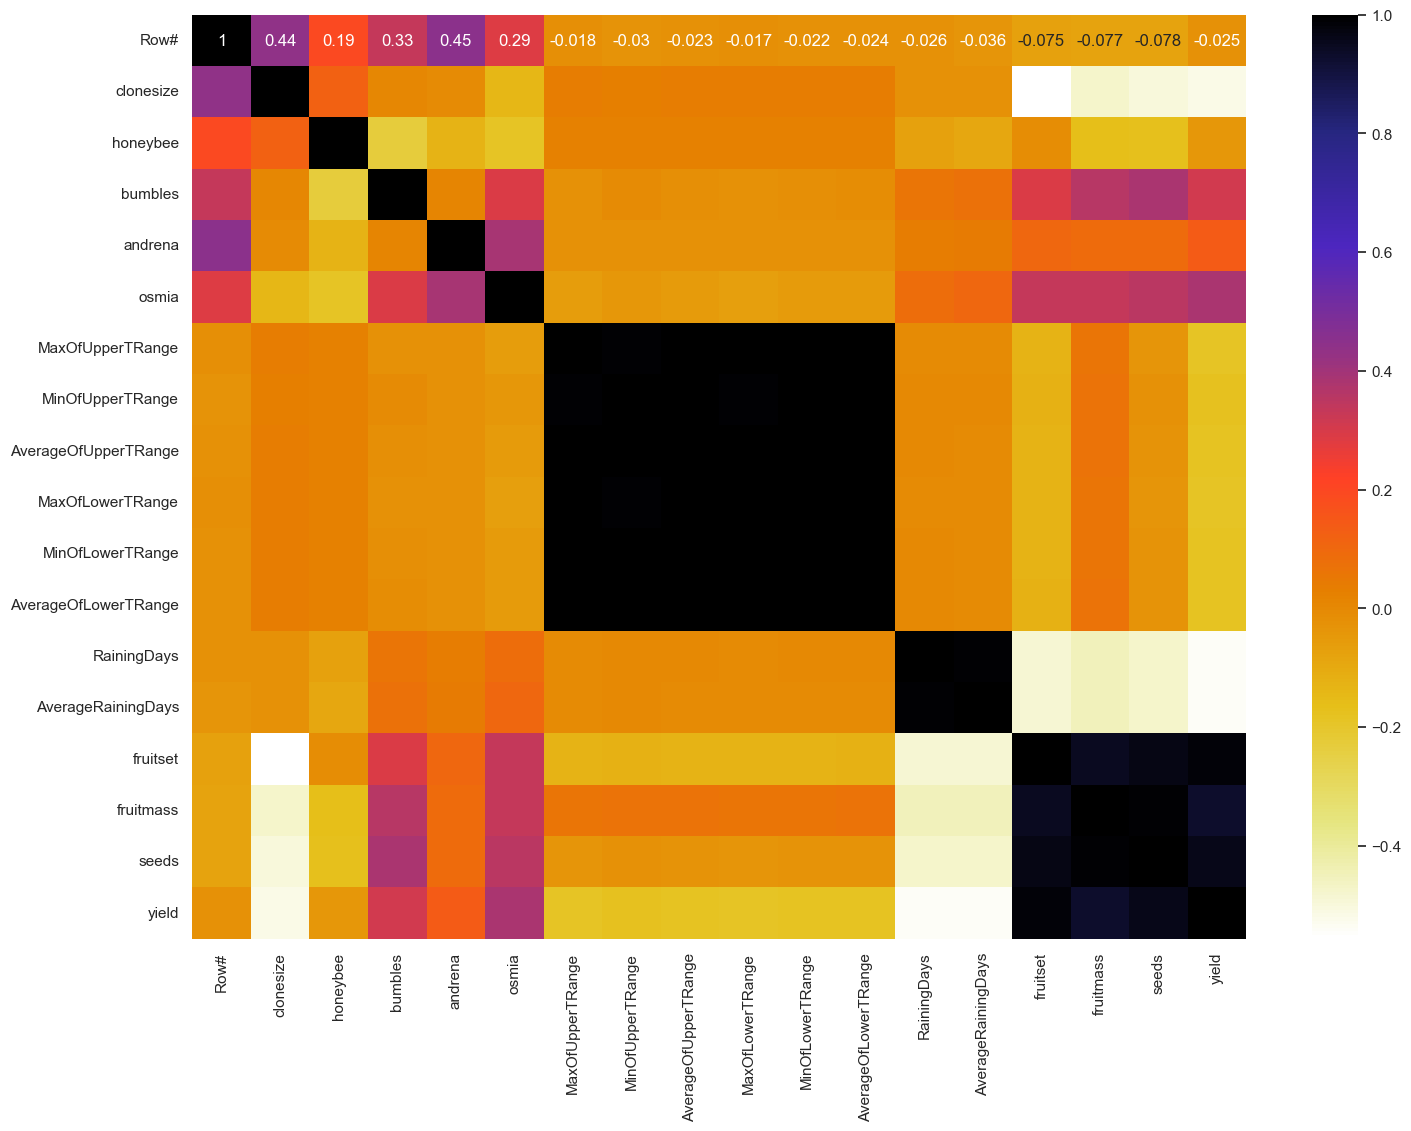

In [27]:
plt.figure(figsize=(17,12))
sns.set()
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [21]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [23]:
bbry_data_process = df.drop(columns=['Row#', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'honeybee', "fruitset", "fruitmass", "seeds"])
bbry_data_process

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26,3813.165795
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10,4947.605663
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26,3866.798965
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10,4303.943030
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39,3436.493543
...,...,...,...,...,...,...,...,...
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06,5333.873335
773,40.0,0.117,0.409,0.058,71.9,50.8,0.06,3373.436842
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39,4203.027624
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06,4166.299735


In [24]:
part1=bbry_data_process.drop(columns=['yield'])
part2=bbry_data_process['yield']
part1

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39
...,...,...,...,...,...,...,...
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06
773,40.0,0.117,0.409,0.058,71.9,50.8,0.06
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06


In [28]:
Q1=part1.quantile(0.25)
Q3=part1.quantile(0.75)
IQR=Q3-Q1
print(IQR)

clonesize               12.50
bumbles                  0.13
andrena                  0.25
osmia                    0.25
AverageOfUpperTRange     7.20
AverageOfLowerTRange     5.00
AverageRainingDays       0.29
dtype: float64


In [29]:
bbry_data_iqr=part1[~((part1<(Q1-1.5*IQR))|(part1>(Q3+1.5*IQR))).any(axis=1)]
bbry_data_iqr

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays
0,37.5,0.25,0.25,0.25,71.9,50.8,0.26
1,37.5,0.25,0.25,0.25,71.9,50.8,0.10
2,37.5,0.25,0.25,0.25,79.0,55.9,0.26
3,37.5,0.25,0.25,0.25,79.0,55.9,0.10
4,37.5,0.25,0.25,0.25,71.9,50.8,0.39
...,...,...,...,...,...,...,...
754,25.0,0.38,0.63,0.50,64.7,45.8,0.10
755,25.0,0.38,0.63,0.50,58.2,41.2,0.26
756,25.0,0.38,0.63,0.50,58.2,41.2,0.10
757,25.0,0.38,0.63,0.50,64.7,45.8,0.39


In [30]:
print(~((part1<(Q1-1.5*IQR))|(part1>(Q3+1.5*IQR))))

     clonesize  bumbles  andrena  osmia  AverageOfUpperTRange  \
0         True     True     True   True                  True   
1         True     True     True   True                  True   
2         True     True     True   True                  True   
3         True     True     True   True                  True   
4         True     True     True   True                  True   
..         ...      ...      ...    ...                   ...   
772       True     True     True  False                  True   
773       True     True     True  False                  True   
774       True     True     True  False                  True   
775       True     True     True  False                  True   
776       True     True     True  False                  True   

     AverageOfLowerTRange  AverageRainingDays  
0                    True                True  
1                    True                True  
2                    True                True  
3                    True  

clonesize                   Axes(0.125,0.77;0.227941x0.11)
bumbles                  Axes(0.398529,0.77;0.227941x0.11)
andrena                  Axes(0.672059,0.77;0.227941x0.11)
osmia                      Axes(0.125,0.638;0.227941x0.11)
AverageOfUpperTRange    Axes(0.398529,0.638;0.227941x0.11)
AverageOfLowerTRange    Axes(0.672059,0.638;0.227941x0.11)
AverageRainingDays         Axes(0.125,0.506;0.227941x0.11)
dtype: object

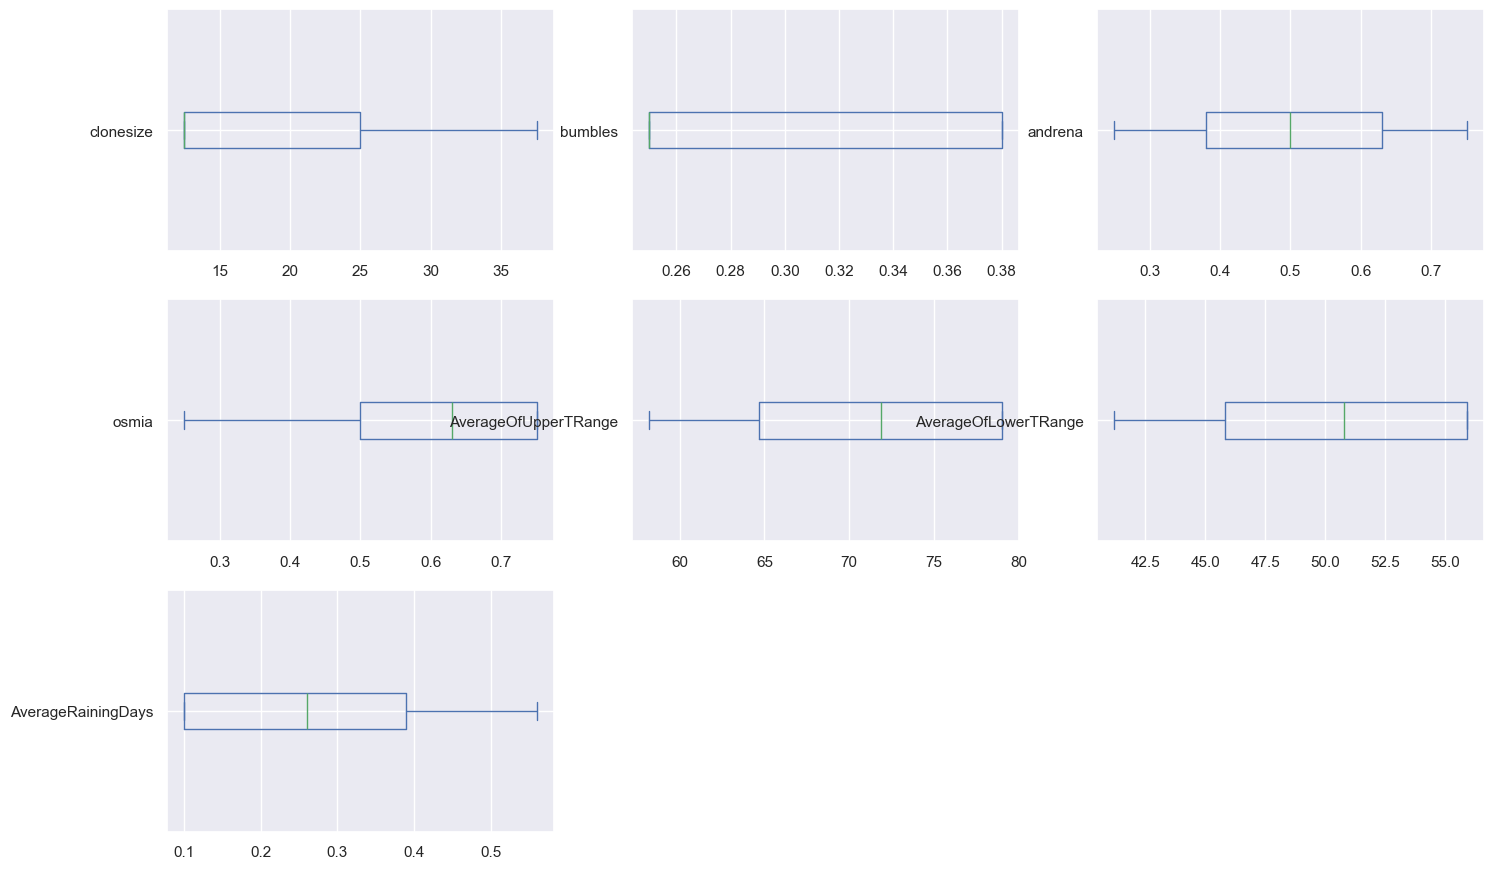

In [31]:
bbry_data_iqr.plot(kind="box", 
                vert=False, # makes horizontal plots instead of vertical
                subplots=True, 
                layout = (6,3), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False)
#Observed that there are no outliers present in the dataset

In [32]:
import scipy.stats as stats

z=np.abs(stats.zscore(bbry_data_process))
print(z)

     clonesize   bumbles   andrena     osmia  AverageOfUpperTRange  \
0     2.678126  0.488512  1.359549  1.846405              0.414096   
1     2.678126  0.488512  1.359549  1.846405              0.414096   
2     2.678126  0.488512  1.359549  1.846405              1.339534   
3     2.678126  0.488512  1.359549  1.846405              1.339534   
4     2.678126  0.488512  1.359549  1.846405              0.414096   
..         ...       ...       ...       ...                   ...   
772   1.253503  2.494523  0.371655  2.982429              0.414096   
773   3.035546  2.494523  0.371655  2.982429              0.414096   
774   0.176180  2.494523  0.371655  2.982429              0.414096   
775   0.176180  2.494523  0.371655  2.982429              0.407067   
776   0.176180  2.494523  0.371655  2.982429              0.407067   

     AverageOfLowerTRange  AverageRainingDays     yield  
0                0.403960            0.350531  1.622087  
1                0.403960            1.2852

In [33]:
bbry_data_zscore=bbry_data_process[(z<3).all(axis=1)]
bbry_data_zscore

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26,3813.165795
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10,4947.605663
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26,3866.798965
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10,4303.943030
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39,3436.493543
...,...,...,...,...,...,...,...,...
770,20.0,0.293,0.234,0.058,71.9,50.8,0.06,5449.421199
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06,5333.873335
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39,4203.027624
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06,4166.299735


clonesize                   Axes(0.125,0.77;0.227941x0.11)
bumbles                  Axes(0.398529,0.77;0.227941x0.11)
andrena                  Axes(0.672059,0.77;0.227941x0.11)
osmia                      Axes(0.125,0.638;0.227941x0.11)
AverageOfUpperTRange    Axes(0.398529,0.638;0.227941x0.11)
AverageOfLowerTRange    Axes(0.672059,0.638;0.227941x0.11)
AverageRainingDays         Axes(0.125,0.506;0.227941x0.11)
yield                   Axes(0.398529,0.506;0.227941x0.11)
dtype: object

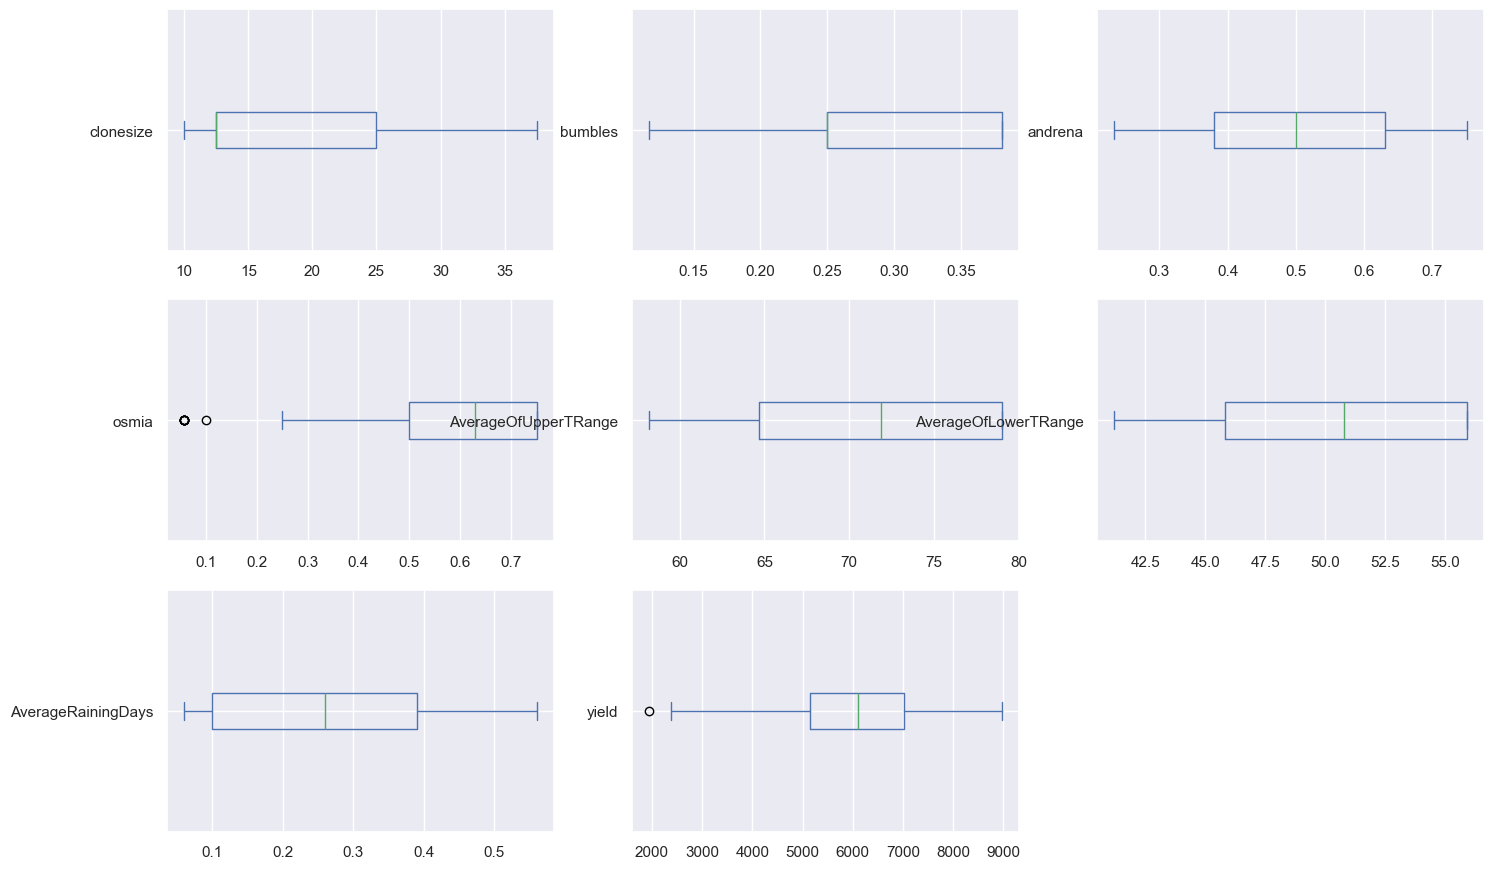

In [34]:
bbry_data_zscore.plot(kind="box", 
                vert=False, # makes horizontal plots instead of vertical
                subplots=True, 
                layout = (6,3), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False)

Now we will be checking the training on both data frames after removing outliers i.e IQR and z-score

# <span style="font-family:cursive;text-align:center">🔘 Feature Selection</span>

In [36]:
def select_features_corr_based(X_train, y_train, X_test, x='all'):
    if type(x)==str:
        fs_corr=SelectKBest(score_func=f_regression, k='all')
    else:
        fs_corr=SelectKBest(score_func=f_regression, k=x)

    fs_corr.fit(X_train, y_train)
    X_train_fs=fs_corr.transform(X_train)
    X_test_fs=fs_corr.transform(X_test)

    return X_train_fs, X_test_fs, fs_corr

def select_features_infogain_based(X_train, y_train, X_test, x='all'):
    if type(x)==str:
        fs_info=SelectKBest(score_func=mutual_info_regression, k='all')
    else:
        fs_info=SelectKBest(score_func=mutual_info_regression, k=x)

    fs_info.fit(X_train, y_train)
    X_train_fs=fs_info.transform(X_train)
    X_test_fs=fs_info.transform(X_test)

    return X_train_fs, X_test_fs, fs_info
        

In [37]:
X=bbry_data_zscore.drop(columns=['yield'], axis=1)
y=bbry_data_zscore['yield']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=1)

X_train_fs_corr, X_test_fs_corr, fs_corr=select_features_corr_based(X_train, y_train, X_test)
X_train_fs_info, X_test_fs_info, fs_info=select_features_infogain_based(X_train, y_train, X_test)

Feature clonesize: 197.463675
Feature bumbles: 28.488060
Feature andrena: 7.497100
Feature osmia: 86.995221
Feature AverageOfUpperTRange: 16.802420
Feature AverageOfLowerTRange: 16.641514
Feature AverageRainingDays: 273.072671


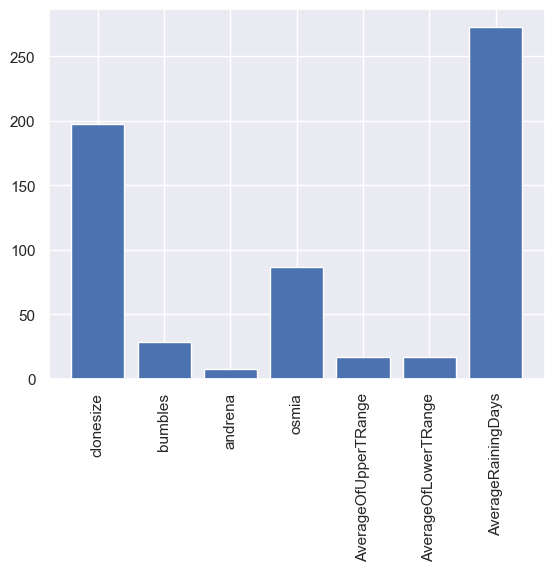

Feature clonesize: 0.163987
Feature bumbles: 0.022046
Feature andrena: 0.048572
Feature osmia: 0.104581
Feature AverageOfUpperTRange: 0.074052
Feature AverageOfLowerTRange: 0.073958
Feature AverageRainingDays: 0.227059


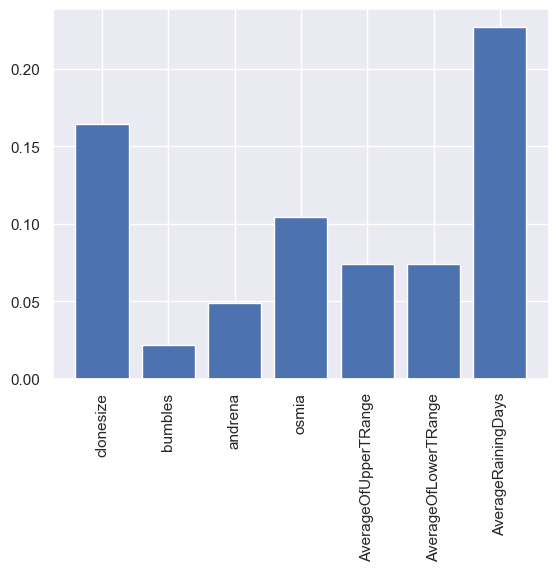

In [38]:
def fs_score_plot(fs_func):
    
    for i in range(len(fs_func.get_feature_names_out())):
        print('Feature %s: %f' % (fs_func.get_feature_names_out()[i], fs_func.scores_[i]))
    # plot the scores
    plt.bar(fs_func.get_feature_names_out(), fs_func.scores_)
    plt.xticks(rotation=90)
    plt.show()
    
fs_score_plot(fs_corr)
fs_score_plot(fs_info)

# <span style="font-family:cursive;text-align:center">🧰 Modelling</span> 

In [40]:
X = bbry_data_zscore.drop(["yield"], axis=1)
y = bbry_data_zscore['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

X_train_fs, X_test_fs, fs_info = select_features_infogain_based(X_train, y_train, X_test, x=7)

LINEAR REGRESSION

In [41]:
lreg=LinearRegression()
lreg.fit(X_train_fs, y_train)
yhat=lreg.predict(X_test_fs)

In [42]:
mae_linear = mean_absolute_error(y_test, yhat)
mse_linear = mean_squared_error(y_test, yhat)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 498.588
MSE: 362441.786
RMSE: 602.031
R-Square: 0.804


RANDOM FOREST REGRESSION

In [43]:
rf = RandomForestRegressor()

rf.fit(X_train_fs, y_train)
    
yhat = rf.predict(X_test_fs)

In [79]:
X_train

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays
717,25.0,0.38,0.50,0.63,71.9,50.8,0.39
274,12.5,0.25,0.63,0.50,58.2,41.2,0.56
724,25.0,0.38,0.50,0.63,58.2,41.2,0.10
699,25.0,0.38,0.50,0.50,79.0,55.9,0.26
116,12.5,0.25,0.25,0.75,71.9,50.8,0.10
...,...,...,...,...,...,...,...
645,25.0,0.25,0.75,0.75,64.7,45.8,0.39
715,25.0,0.38,0.50,0.63,79.0,55.9,0.26
72,12.5,0.25,0.25,0.38,71.9,50.8,0.56
235,12.5,0.25,0.50,0.63,64.7,45.8,0.26


In [44]:
mae_rf = mean_absolute_error(y_test, yhat)
mse_rf = mean_squared_error(y_test, yhat)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_rf)
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)
print('R-Square: %.3f' % rsq_rf)

MAE: 210.824
MSE: 72700.056
RMSE: 269.629
R-Square: 0.961


DESCISION TREE

In [45]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train_fs, y_train)

yhat = dtree.predict(X_test_fs)

In [46]:
mae_dt = mean_absolute_error(y_test, yhat)
mse_dt = mean_squared_error(y_test, yhat)
rmse_dt = np.sqrt(mse_dt)
rsq_dt = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_dt)
print('MSE: %.3f' % mse_dt)
print('RMSE: %.3f' % rmse_dt)
print('R-Square: %.3f' % rsq_dt)

MAE: 262.459
MSE: 119999.016
RMSE: 346.409
R-Square: 0.935


XGBRegression

In [47]:
xgb = XGBRegressor()

xgb.fit(X_train_fs, y_train)

yhat = xgb.predict(X_test_fs)

In [48]:
mae_xgb = mean_absolute_error(y_test, yhat)
mse_xgb = mean_squared_error(y_test, yhat)
rmse_xgb = np.sqrt(mse_dt)
rsq_xgb = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

MAE: 193.592
MSE: 62385.734
RMSE: 346.409
R-Square: 0.966


PLOTTING THE SCORES AND VISUALIZATION

<Axes: >

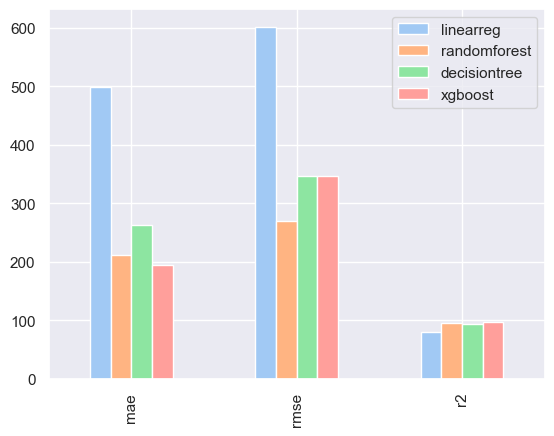

In [49]:
error_rec = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    "randomforest": {
        "mae": mae_rf,
        "rmse": rmse_rf,
        'r2': rsq_rf*100
    },
    "decisiontree": {
        "mae": mae_dt,
        "rmse": rmse_dt,
        'r2': rsq_dt*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]])

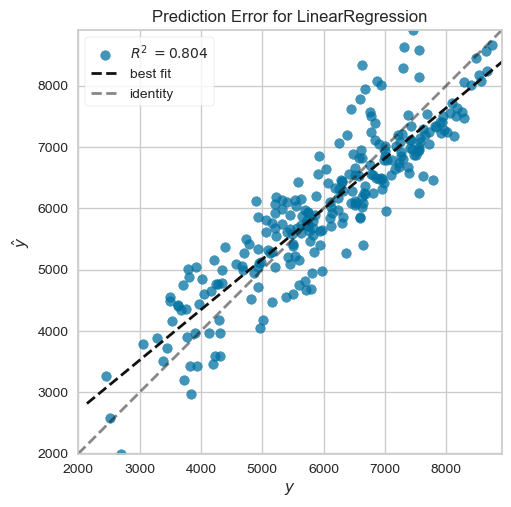

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [56]:
import yellowbrick
from yellowbrick.regressor import PredictionError,ResidualsPlot
visualizer=PredictionError(lreg)
visualizer.fit(X_train_fs, y_train)
visualizer.score(X_test_fs, y_test)
visualizer.show()


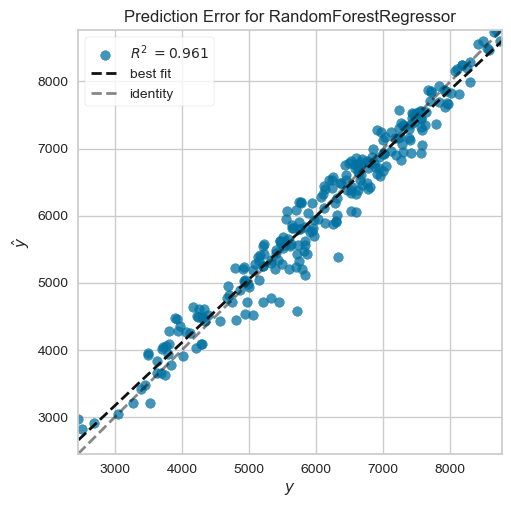

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [57]:
visualizer=PredictionError(rf)
visualizer.fit(X_train_fs, y_train)
visualizer.score(X_test_fs, y_test)
visualizer.show()
#we will choose random forest coz of rmse

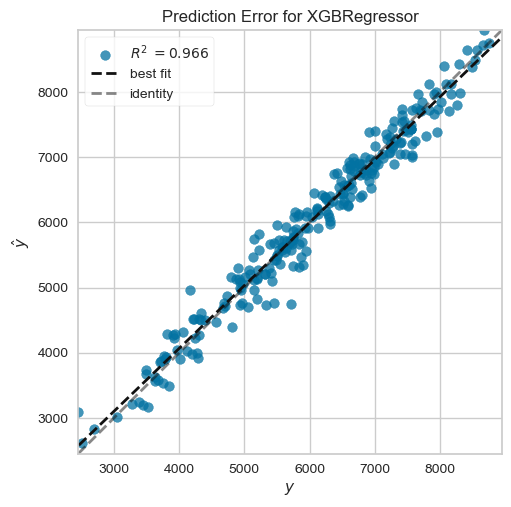

<Axes: title={'center': 'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [58]:
visualizer=PredictionError(xgb)
visualizer.fit(X_train_fs, y_train)
visualizer.score(X_test_fs, y_test)
visualizer.show()

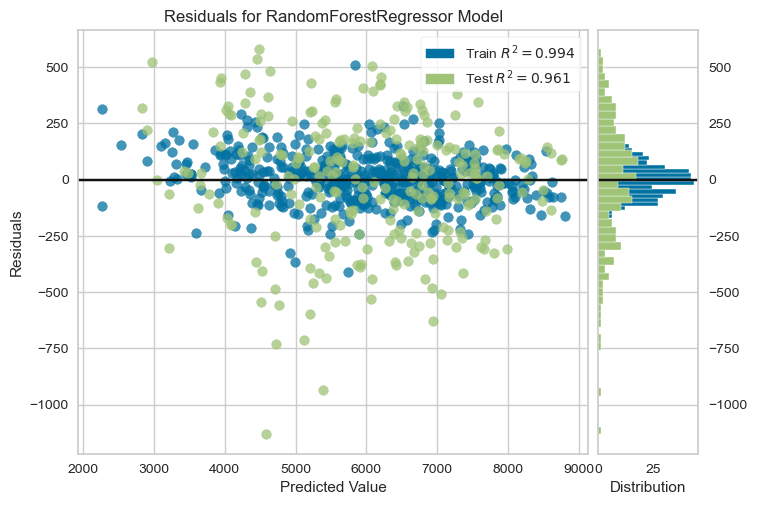

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [59]:
#residual plot of random forest
visualizer=ResidualsPlot(rf)
visualizer.fit(X_train_fs, y_train)
visualizer.score(X_test_fs, y_test)
visualizer.show()

In [61]:
import joblib
filename='blueberry_yield_model.pkl'
joblib.dump(rf, filename)

['blueberry_yield_model.pkl']

# <span style="font-family:cursive;text-align:center">Model Explainability (Explainable AI)</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">



In [62]:
import shap

In [63]:
shape_values=shap.TreeExplainer(rf).shap_values(X_train_fs)

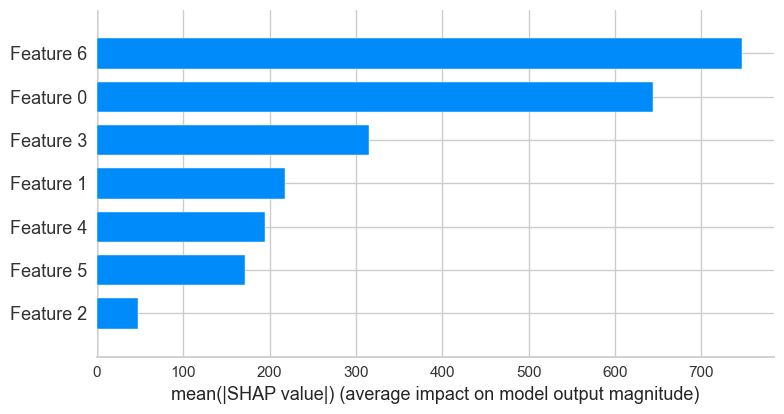

In [70]:
shap.summary_plot(shape_values, X_test_fs, plot_type='bar')

In [69]:
X_train

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays
717,25.0,0.38,0.50,0.63,71.9,50.8,0.39
274,12.5,0.25,0.63,0.50,58.2,41.2,0.56
724,25.0,0.38,0.50,0.63,58.2,41.2,0.10
699,25.0,0.38,0.50,0.50,79.0,55.9,0.26
116,12.5,0.25,0.25,0.75,71.9,50.8,0.10
...,...,...,...,...,...,...,...
645,25.0,0.25,0.75,0.75,64.7,45.8,0.39
715,25.0,0.38,0.50,0.63,79.0,55.9,0.26
72,12.5,0.25,0.25,0.38,71.9,50.8,0.56
235,12.5,0.25,0.50,0.63,64.7,45.8,0.26


In [92]:
X_train['AverageRainingDays'].unique()

array([0.39, 0.56, 0.1 , 0.26, 0.06])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


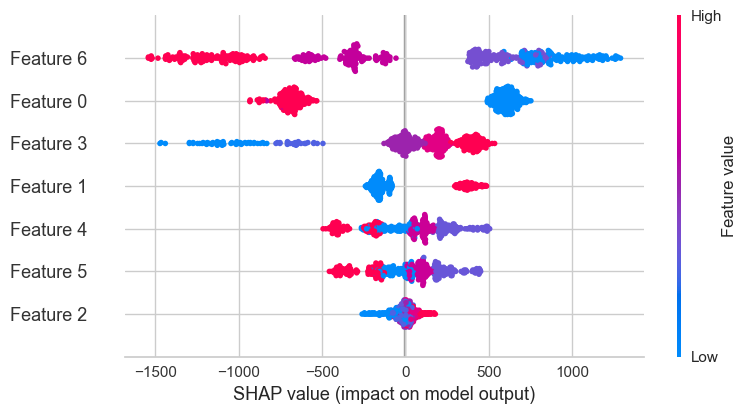

In [71]:
shap.summary_plot(shape_values, X_train_fs)

In [74]:
shap.initjs()
shap.force_plot(shap.TreeExplainer(rf).expected_value, shape_values[0], X_train.iloc[0])

In [75]:
rf.predict(X_test_fs)

array([6707.4091462 , 7248.63261002, 5617.22256225, 7165.34555217,
       4644.57216301, 4087.35762751, 5337.67807117, 7160.65896935,
       5890.23456404, 6394.27435499, 5917.21520026, 7564.35545369,
       7462.59684826, 4942.27379102, 7990.16657727, 7807.31796827,
       4492.83925069, 5202.0502736 , 7342.70007603, 7572.96538895,
       5344.71778065, 4090.66050893, 5910.01531169, 7127.49523462,
       6190.44602654, 5777.19777703, 6004.75666986, 6852.01983579,
       4509.36160007, 5240.48592151, 6329.27959811, 5549.44041028,
       6189.77345453, 3661.57826943, 4516.95312366, 3906.62535485,
       4460.50248081, 6655.72316341, 7833.9092987 , 4246.73642281,
       6382.81471406, 7309.09483747, 2976.756462  , 7553.63223759,
       6480.48767262, 4016.49255469, 4492.83925069, 7658.43281948,
       5694.44574675, 7362.16890399, 5809.44366765, 8250.41223845,
       6389.0795599 , 6730.43900695, 4443.53137313, 6335.87236506,
       5230.89788321, 7695.79968272, 5549.82895683, 5041.68660

In [76]:
y_test

285    6771.674965
101    6960.107506
581    5529.066137
352    7019.694384
632    4163.823044
          ...     
491    5632.459174
49     6318.708722
31     3049.260316
601    5772.910164
510    3764.319732
Name: yield, Length: 254, dtype: float64